In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
import os
print(os.getcwd())




C:\Users\jayshear\energy-prediction


In [8]:
import os
print(os.getcwd())



C:\Users\jayshear\energy-prediction


In [9]:
data = pd.read_csv("data/energy.csv")

In [11]:
import os

print(os.listdir("data"))



['energy.csv']


In [12]:
print(data.head())


   Temperature  Humidity  Light  CO2  HumidityRatio  EnergyConsumption
0         22.5      45.1    350  800         0.0047               12.5
1         23.2      44.8    370  820         0.0046               13.0
2         21.8      47.3    300  780         0.0049               11.8
3         24.0      43.0    420  850         0.0044               13.5
4         25.1      40.5    480  870         0.0042               14.2


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        10 non-null     float64
 1   Humidity           10 non-null     float64
 2   Light              10 non-null     int64  
 3   CO2                10 non-null     int64  
 4   HumidityRatio      10 non-null     float64
 5   EnergyConsumption  10 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 612.0 bytes


In [14]:
data.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,EnergyConsumption
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,23.400000,43.880000,389.000000,828.500000,0.004510,13.000000
std,1.652607,3.308508,84.649605,41.769872,0.000367,1.207385
min,20.900000,38.700000,250.000000,760.000000,0.004000,10.900000
25%,22.125000,41.475000,335.000000,802.500000,0.004225,12.125000
50%,23.450000,43.900000,390.000000,830.000000,0.004500,13.150000
75%,24.375000,46.375000,450.000000,861.250000,0.004775,13.875000
max,26.300000,49.100000,520.000000,890.000000,0.005100,14.800000


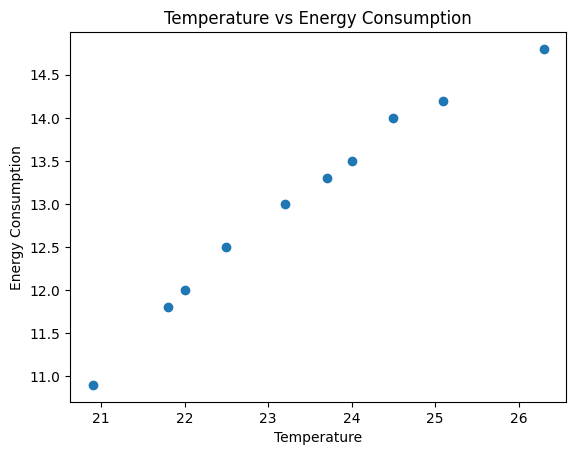

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data["Temperature"], data["EnergyConsumption"])
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title("Temperature vs Energy Consumption")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]]
y = data["EnergyConsumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model score:", model.score(X_test, y_test))


Model score: 0.7668528124296696


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
data = pd.read_csv("data/energy.csv")


In [20]:
print(data.head())
print(data.describe())
print(data.info())


   Temperature  Humidity  Light  CO2  HumidityRatio  EnergyConsumption
0         22.5      45.1    350  800         0.0047               12.5
1         23.2      44.8    370  820         0.0046               13.0
2         21.8      47.3    300  780         0.0049               11.8
3         24.0      43.0    420  850         0.0044               13.5
4         25.1      40.5    480  870         0.0042               14.2
       Temperature   Humidity       Light         CO2  HumidityRatio  \
count    10.000000  10.000000   10.000000   10.000000      10.000000   
mean     23.400000  43.880000  389.000000  828.500000       0.004510   
std       1.652607   3.308508   84.649605   41.769872       0.000367   
min      20.900000  38.700000  250.000000  760.000000       0.004000   
25%      22.125000  41.475000  335.000000  802.500000       0.004225   
50%      23.450000  43.900000  390.000000  830.000000       0.004500   
75%      24.375000  46.375000  450.000000  861.250000       0.004775  

In [21]:
X = data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]]
y = data["EnergyConsumption"]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Absolute Error: 0.23416107858277613
Mean Squared Error: 0.05828679689258258
R² Score: 0.7668528124296696


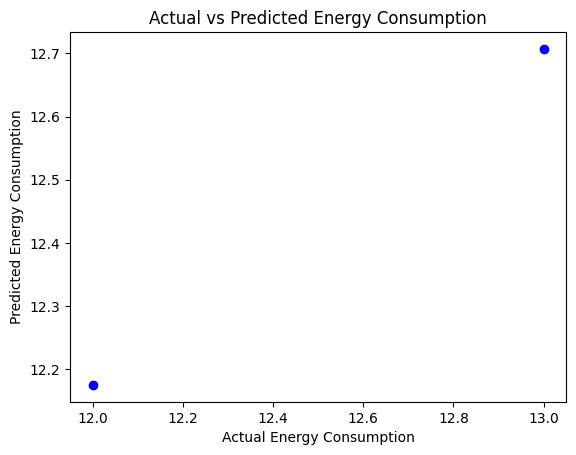

In [25]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


In [26]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


               Coefficient
Temperature      -0.103290
Humidity          0.045123
Light             0.018313
CO2              -0.002649
HumidityRatio  -199.302521


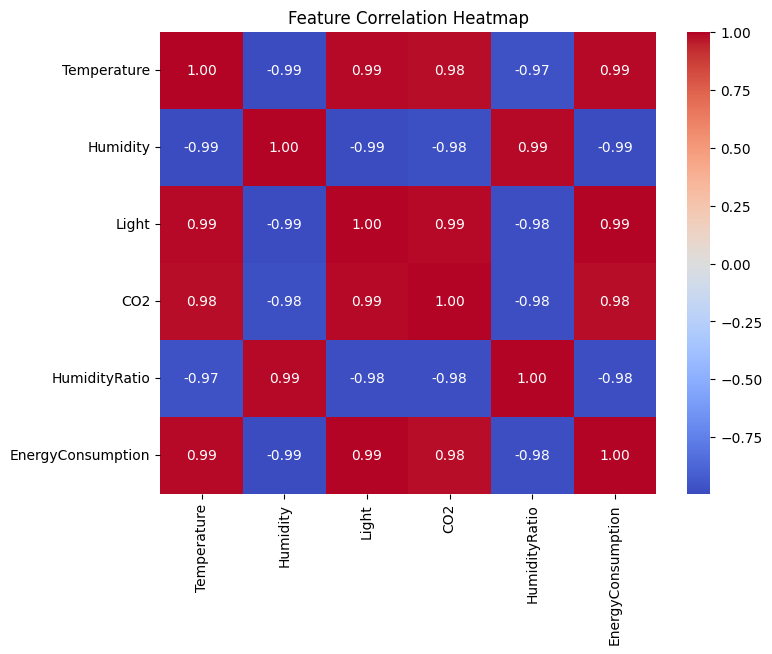

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


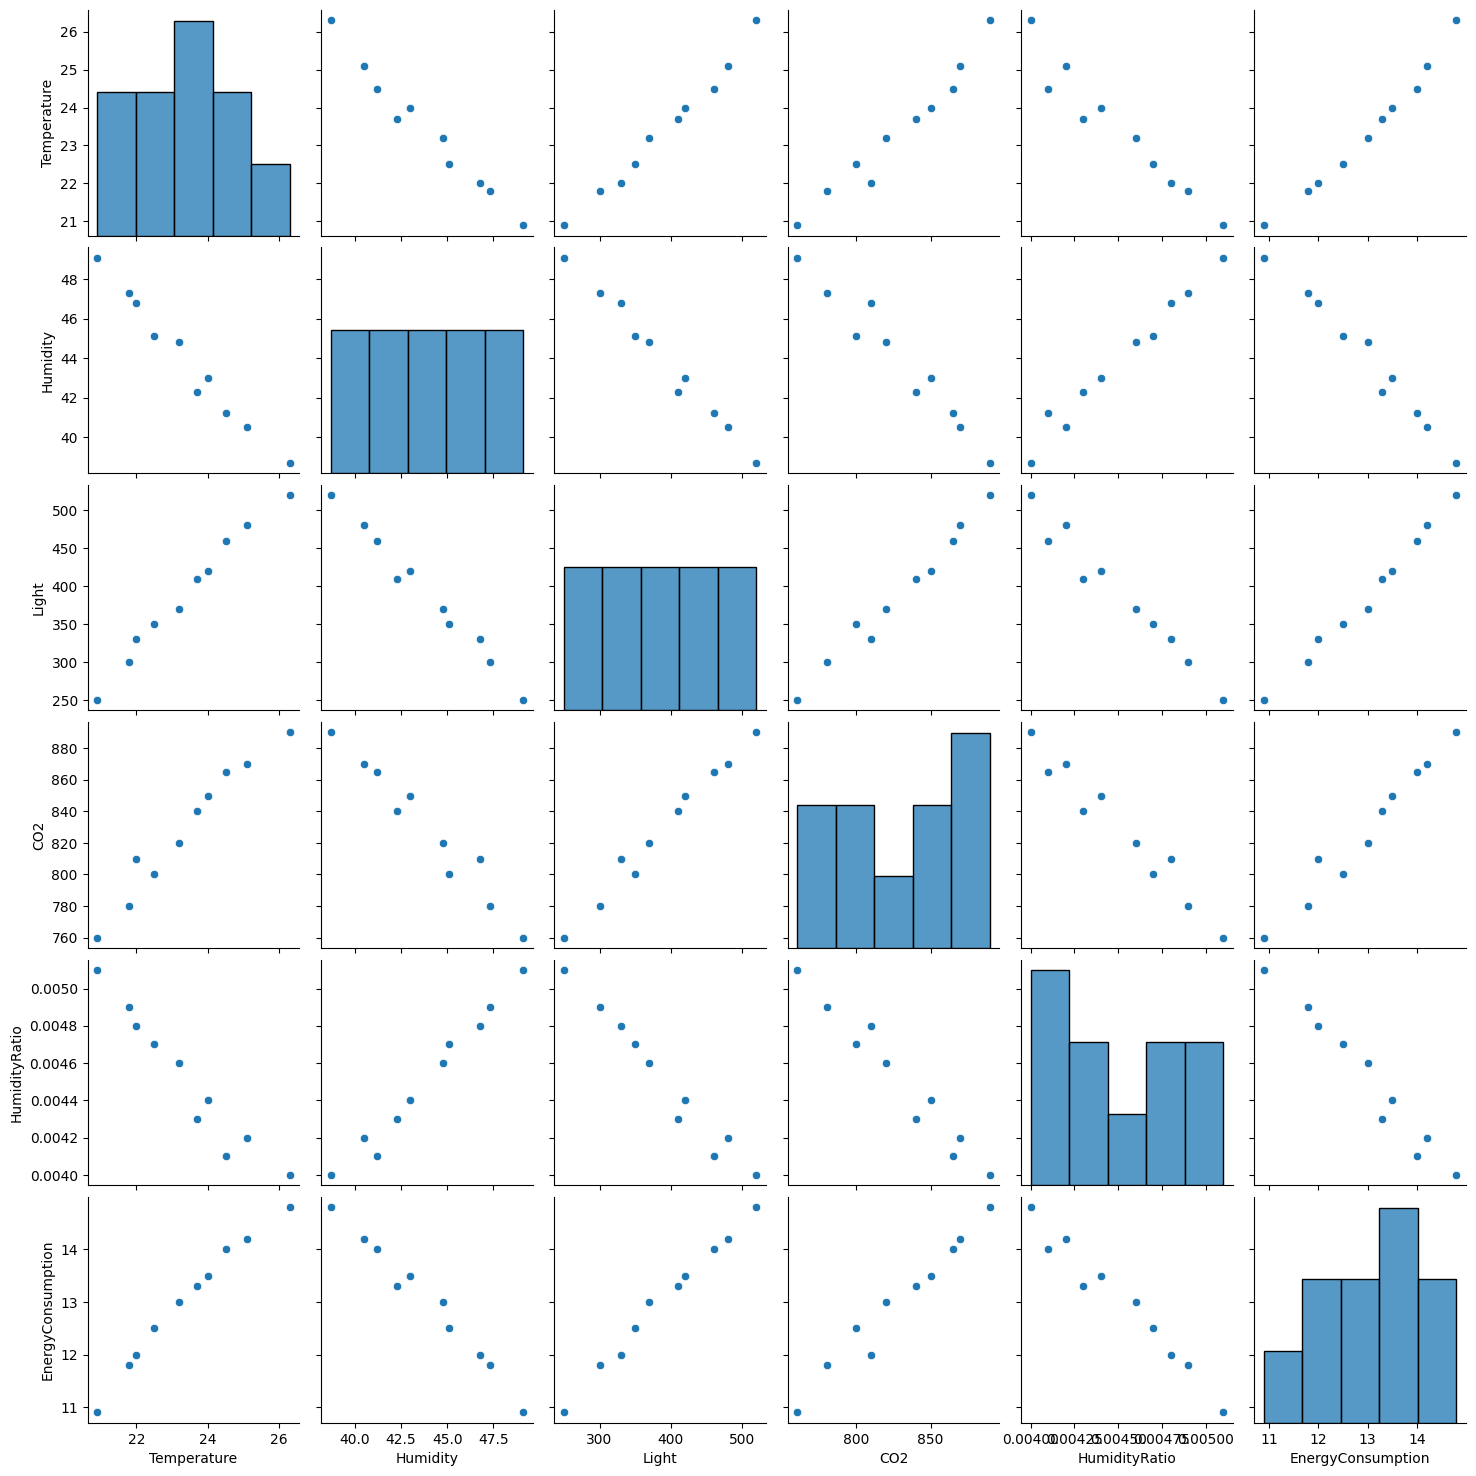

In [28]:
sns.pairplot(data)
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [30]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R² Score:", rf_r2)


Random Forest Performance:
MAE: 0.1369999999999978
MSE: 0.01934499999999982
R² Score: 0.9226200000000007


In [31]:
print("Model Comparison:")
print(f"Linear Regression R²: {r2:.3f}")
print(f"Random Forest R²: {rf_r2:.3f}")


Model Comparison:
Linear Regression R²: 0.767
Random Forest R²: 0.923


C:\Users\jayshear\AppData\Local\Temp\ipykernel_14536\1970056959.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


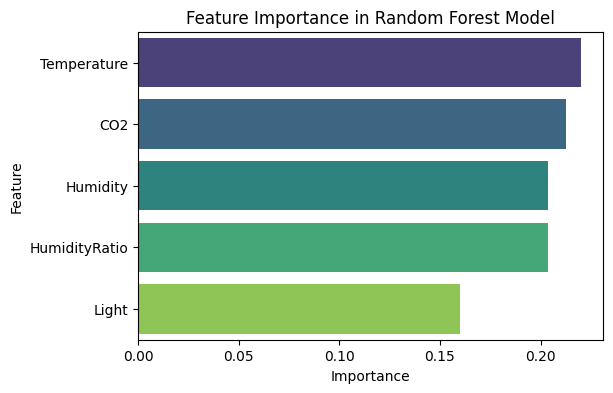

In [32]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: xlabel='Importance', ylabel='Feature'>

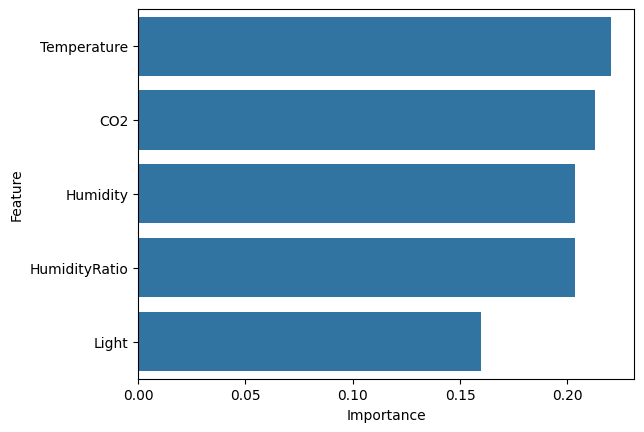

In [35]:
sns.barplot(x='Importance', y='Feature', data=importances)
